In [2]:
import random
import numpy as np
weights = np.array([]) # actual weights
inputs = np.array([]) # Inputs
predicted_weights = np.array([])
for i in range(7000):
  weights = np.append(weights, round(random.uniform(0, 0.9), 2))
  predicted_weights = np.append(predicted_weights, round(random.uniform(0, 0.9), 2))
  inputs = np.append(inputs, random.randint(1, 5))
actual_output = np.dot(weights, inputs)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Define a Neuron class
class Neuron:

    # Constructor to initialize inputs and weights
    def __init__(self, inputs, weights, actual_output, power, learning_rate=0.1, iterations= None):
        self.inputs = inputs    # Store input values
        self.weights = weights  # Store weight values
        self.actual_output = actual_output  # Store actual output
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.iterations = iterations  # Number of iterations for training
        self.power = power
        self.loss_history = []

    # Method to compute the weighted sum (Z = X1*W1 + X2*W2 + ... + Xn*Wn)
    def weightedSum(self):
        return np.dot(self.inputs, self.weights)  # Compute dot product of inputs and weights

    # Sigmoid activation function to introduce non-linearity
    def sigmoid(self, z):
        return z # 1 / (1 + np.exp(-z))  # Compute sigmoid: 1 / (1 + e^(-z))

    # Mean Squared Error (MSE) Calculation
    def computeMSE(self, predicted_output):
        return np.mean(self.actual_output - predicted_output) ** 2

    # Fraction Power to a value
    def fracPower(self, value, power):
      if value >= 0:
        return np.abs(value) ** power
      else:
        return -1 * np.abs(value) ** power


    # Method to perform Gradient Descent and update weights
    def train(self):
        for i in range(self.iterations):
            z = self.weightedSum()
            predicted_output = self.sigmoid(z)

            # Compute MSE Loss
            loss = self.computeMSE(predicted_output)
            self.loss_history.append(loss)

            # Compute gradient of MSE w.r.t. weights
            error = predicted_output - self.actual_output

            # Apply fractional Power
            for i in range(len(self.inputs)):
              self.inputs[i] = self.fracPower(self.inputs[i], self.power)

            gradient = self.fracPower(error, self.power) * self.inputs  # Derivative of MSE

            # print(f"This is error : {self.inputs}")

            # gradient = self.fracPower(error,2-beta) * self.fracPower(self.input,beta)
            # def FracPower(input,order)
            # sign(input)*( abs(input)**(beta)

            # Update weights using Gradient Descent
            # print(weights)
            self.weights -= self.learning_rate * gradient

            # Print loss for every iterations
            # print(f"Iteration {i}: Loss = {loss:.2f}")

    # Method to calculate the final output of the neuron
    def output(self):
        z = self.weightedSum()  # Compute weighted
        return self.sigmoid(z)  # Apply sigmoid activation and return final output

    def plotLoss(self):
        """Plot loss over iterations."""
        plt.plot(range(self.iterations), self.loss_history, label="Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Reduction Over Iterations")
        plt.legend()
        plt.show()



power = 0.1

# Create an instance of the Neuron class
obj = Neuron(inputs, predicted_weights, actual_output, power, iterations=100)

# Train the neuron
obj.train()

# Compute and print the final neuron's output after training
print(f"Final Output of a Neuron = {obj.output()}, over actual output {actual_output}")

Final Output of a Neuron = 8831.119482941796, over actual output 9502.15


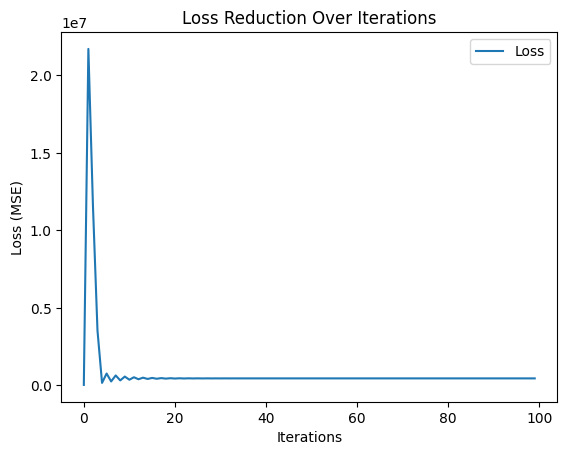

In [4]:
# Plot Loss Curve
obj.plotLoss()